0. 초깃값 선정

    ${\hat{x}}_0,\ P_0$
<br>

1. 추정값과 오차 공분산 예측

    ${\hat{x}}_k^-=A{\hat{x}}_k$ <br>
$P_k^-=AP_{k-1}A^T+Q$
<br>

2. 칼만 이득 계산

    $K_k=P_k^-H^T\left(HP_k^-H^T+R\right)^{-1}$
<br>

3. 추정값 계산

    ${\hat{x}}_k={\hat{x}}_k^-+K_k\left(z_k-H{\hat{x}}_k^-\right)$
<br>

4. 오차 공분산 계산

    $P_k=P_k^--K_kHP_k^-$
<br>

---

$x_{k+1}=Ax_k+w_k$<br>
$z_k=Hx_k+v_k$<br>
$\mathcal{Q}=covariance\ matrix\ of\ w_k$<br>
$R=covariance\ matrix\ of\ v_k$


$x_{k+1}=x_k$<br>
$z_k=x_k+v_k$<br>
$x_0=14.4$<br>
$v_k=\mathcal{N}(0,2^2)$


---

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [4]:
def get_volt():
    """Measure voltage."""
    v = np.random.normal(0, 2)   # v: measurement noise.
    volt_true = 14.4             # volt_true: True voltage [V].
    z_volt_meas = volt_true + v  # z_volt_meas: Measured Voltage [V] (observable).
    return z_volt_meas

In [5]:
def kalman_filter(z_meas, x_esti, P):
    """Kalman Filter Algorithm for One Variable."""
    # (1) Prediction.
    x_pred = A * x_esti
    P_pred = A * P * A + Q

    # (2) Kalman Gain.
    K = P_pred * H / (H * P_pred * H + R)

    # (3) Estimation.
    x_esti = x_pred + K * (z_meas - H * x_pred)

    # (4) Error Covariance.
    P = P_pred - K * H * P_pred

    return x_esti, P

In [6]:
# Input parameters.
time_end = 10
dt = 0.2

In [7]:
# Initialization for system model.
A = 1
H = 1
Q = 0
R = 4
# Initialization for estimation.
x_0 = 12  # 14 for book.
P_0 = 6

In [8]:
time = np.arange(0, time_end, dt)
n_samples = len(time)
volt_meas_save = np.zeros(n_samples)
volt_esti_save = np.zeros(n_samples)

In [9]:
x_esti, P = None, None
for i in range(n_samples):
    z_meas = get_volt()
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(z_meas, x_esti, P)

    volt_meas_save[i] = z_meas
    volt_esti_save[i] = x_esti

Text(0, 0.5, 'Voltage [V]')

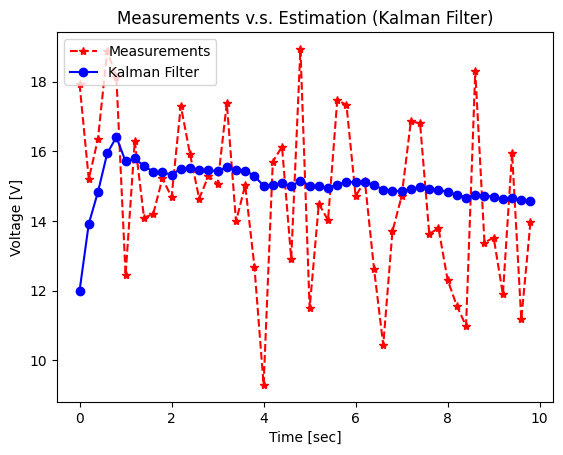

In [11]:
plt.plot(time, volt_meas_save, 'r*--', label='Measurements')
plt.plot(time, volt_esti_save, 'bo-', label='Kalman Filter')
plt.legend(loc='upper left')
plt.title('Measurements v.s. Estimation (Kalman Filter)')
plt.xlabel('Time [sec]')
plt.ylabel('Voltage [V]')
#plt.savefig('png/simple_kalman_filter.png')

## FilterPy를 이용한 변환

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110458 sha256=4dbdd6b46e7dd41ed3e1c6009edeb1eae79fe22fa5c00c0ce4262ed0f9e675f1
  Stored in directory: /root/.cache/pip/wheels/0f/0c/ea/218f266af4ad626897562199fbbcba521b8497303200186102
Successfully built filterpy


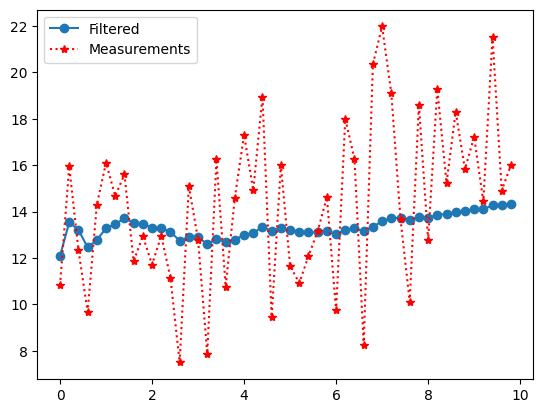

In [13]:
!pip install filterpy

import numpy as np
from filterpy.kalman import KalmanFilter
import matplotlib.pyplot as plt

# 랜덤 노이즈를 포함한 측정값 생성
def get_volt():
    return 14.4 + np.random.normal(0, 4)

# 칼만 필터 초기화
kf = KalmanFilter(dim_x=1, dim_z=1)
kf.F = np.array([[1]])  # 상태 전이 행렬
kf.H = np.array([[1]])  # 관측 행렬
kf.Q = np.array([[0]])  # 프로세스 잡음 공분산
kf.R = np.array([[4]])  # 측정 잡음 공분산
kf.P = np.array([[6]])  # 초기 공분산
kf.x = np.array([[14]]) # 초기 상태

# 칼만 필터 적용
def filterpy_kalman(z):
    kf.predict()
    kf.update(z)
    return kf.x[0, 0]

# 테스트
t = np.arange(0, 10, 0.2)
measurements = [get_volt() for _ in t]
filtered_values = [filterpy_kalman(z) for z in measurements]

# 시각화
plt.plot(t, filtered_values, 'o-', label="Filtered")
plt.plot(t, measurements, 'r:*', label="Measurements")
plt.legend()
plt.show()


## PyKalman을 이용한 변환

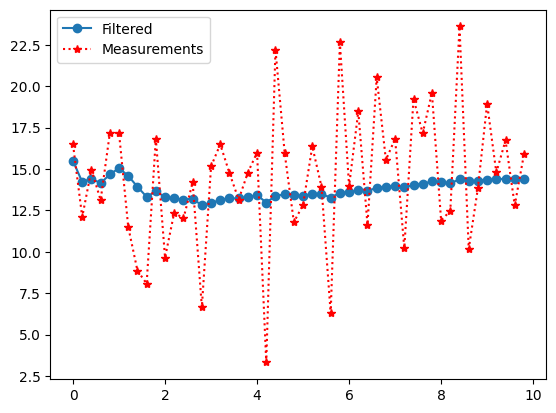

In [17]:
! pip install pykalman

from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt

# 랜덤 노이즈를 포함한 측정값 생성
def get_volt():
    return 14.4 + np.random.normal(0, 4)

# 전체 데이터 생성
t = np.arange(0, 10, 0.2)
measurements = [get_volt() for _ in t]

# 칼만 필터 초기화
kf = KalmanFilter(initial_state_mean=14, initial_state_covariance=6,
                  transition_matrices=[1], observation_matrices=[1],
                  transition_covariance=[[0]], observation_covariance=[[4]])

# 모든 데이터 필터링
filtered_values, _ = kf.filter(measurements)

# 시각화
plt.plot(t, filtered_values, 'o-', label="Filtered")
plt.plot(t, measurements, 'r:*', label="Measurements")
plt.legend()
plt.show()


## OpenCV를 이용한 변환

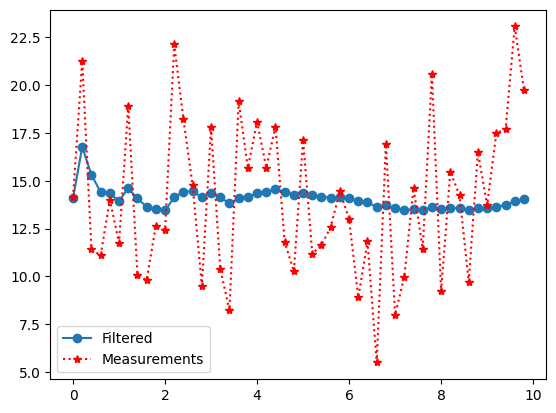

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 랜덤 노이즈를 포함한 측정값 생성
def get_volt():
    return 14.4 + np.random.normal(0, 4)

# OpenCV 칼만 필터 초기화
kf = cv2.KalmanFilter(1, 1)
kf.measurementMatrix = np.array([[1]], np.float32)
kf.transitionMatrix = np.array([[1]], np.float32)
kf.processNoiseCov = np.array([[0]], np.float32)
kf.measurementNoiseCov = np.array([[4]], np.float32)
kf.errorCovPost = np.array([[6]], np.float32)
kf.statePost = np.array([[14]], np.float32)

# 칼만 필터 적용
def opencv_kalman(z):
    kf.predict()
    kf.correct(np.array([[z]], np.float32))
    return kf.statePost[0, 0]

# 테스트
t = np.arange(0, 10, 0.2)
measurements = [get_volt() for _ in t]
filtered_values = [opencv_kalman(z) for z in measurements]

# 시각화
plt.plot(t, filtered_values, 'o-', label="Filtered")
plt.plot(t, measurements, 'r:*', label="Measurements")
plt.legend()
plt.show()


## Python 기본 구현

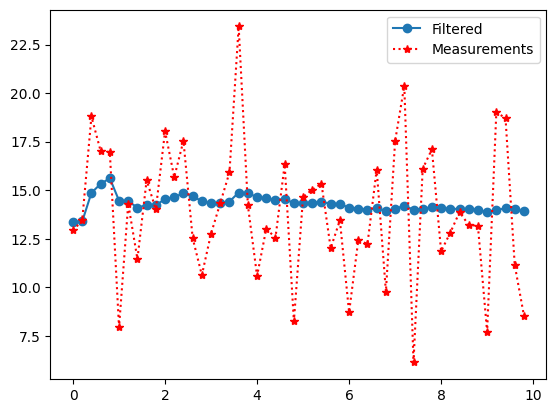

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 초기화
A = 1  # 상태 전이 행렬
H = 1  # 관측 행렬
Q = 0  # 프로세스 잡음 공분산
R = 4  # 측정 잡음 공분산
x = 14  # 초기 상태
P = 6   # 초기 공분산

# 랜덤 노이즈를 포함한 측정값 생성
def get_volt():
    return 14.4 + np.random.normal(0, 4)

# 칼만 필터 적용
def basic_kalman(z):
    global x, P
    # 예측 단계
    xp = A * x
    Pp = A * P * A + Q

    # 칼만 이득 계산
    K = Pp * H / (H * Pp * H + R)

    # 업데이트 단계
    x = xp + K * (z - H * xp)
    P = Pp - K * H * Pp

    return x

# 테스트
t = np.arange(0, 10, 0.2)
measurements = [get_volt() for _ in t]
filtered_values = [basic_kalman(z) for z in measurements]

# 시각화
plt.plot(t, filtered_values, 'o-', label="Filtered")
plt.plot(t, measurements, 'r:*', label="Measurements")
plt.legend()
plt.show()
